In [1]:
import numpy as np
import maze as mz 

# Problem 1: The Maze and the Random Minotaur

We start first by describing the maze as a numpy array. 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

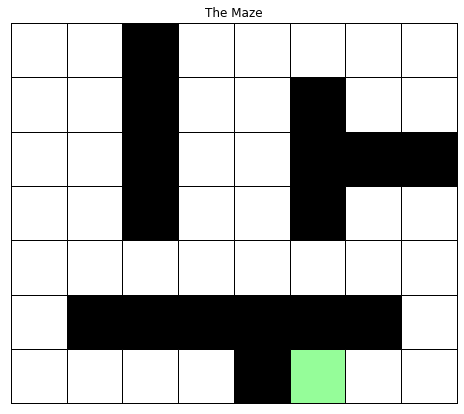

In [3]:
mz.draw_maze(maze)

In [4]:
# Create an environment maze
env = mz.Maze(maze)
# env.show()

In [5]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

In [7]:
method = 'DynProg'
start = (0, 0, 6, 6)
path = env.simulate(start, policy, method)

KeyError: (0, 0, 6, 6)

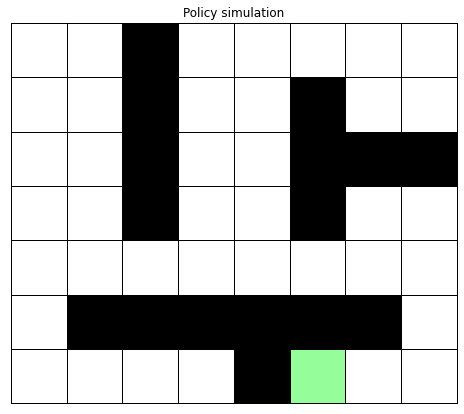

In [8]:
mz.animate_solution(maze, path)